<a href="https://colab.research.google.com/github/fikatriana/Pemograman_Python/blob/main/TUGAS%20BESAR%20PYHTON.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

FIKA TRIANA - 1101194018 - TT-43-G1 - TUGAS BESAR PYTHON 

In [37]:
import numpy as np
import matplotlib.pyplot as plt 

In [38]:
frek1 = 700 #MHz
frek2 = 900 #MHz
frek3 = 1800 #MHz
tipe1 = 'urban'
tipe2 = 'suburban'
tipe3 = 'open'
ht = 80 #meter
hr = 1.5 #meter
d = np.random.randint(300,1001,200)
y1=d**2
y2=d**3
y3=d**4 

In [39]:
print(d)

[679 410 513 699 433 379 729 394 702 326 602 601 427 602 875 412 760 887
 714 324 759 695 486 649 326 332 798 491 798 815 702 610 352 820 624 956
 531 368 902 514 794 810 418 643 373 838 366 526 713 433 486 316 662 600
 978 314 787 530 524 495 974 337 922 311 727 764 413 731 828 917 579 682
 695 485 424 627 342 511 551 584 434 829 433 476 612 458 450 533 730 761
 534 908 708 544 468 541 752 947 658 504 924 726 329 790 987 426 737 553
 523 566 704 773 438 704 940 737 768 754 862 716 771 617 742 681 348 498
 679 678 779 341 411 444 712 666 695 559 724 625 518 310 753 753 939 712
 814 892 573 391 592 757 435 682 599 380 427 768 398 710 807 924 663 582
 433 701 892 337 565 819 854 466 637 922 324 474 743 455 982 789 873 452
 419 759 956 596 553 380 748 808 707 738 941 812 633 769 423 409 370 416
 343 806]


In [40]:
def cos(frek,tipe,ht,hr,d):
  #frek = frekuensi (MHz)
  #tipe = urban, suburban, open
  #ht = tinggi tower (meter)
  #d = jarak (meter)
    if frek in range(150,1501):
        Ca=69.55
        Cb=26.16
    elif frek in range(1501,2001):
      Ca=46.3
      Cb=33.9

    if tipe=='urban' :
      Cm=0
    elif tipe=='suburban' :
      Cm= -2*((np.log10((frek/28)**2))-5.4)
    elif tipe=='open' :
      Cm= -4.78*(np.log10(frek))+18.33*(np.log10(frek))-40.94
    else :
      Cm='tipe salah'
    
    ahr = (1.1*np.log10(frek)-0.7)*hr-(1.56*np.log10(frek)-1.8)
    Lp = Ca+(Cb*np.log10(frek))-(13.83*np.log(ht))-ahr+((44.9-6.55*np.log10(ht))*np.log10(d))-Cm

    return Lp

In [41]:
#Frekuensi 1800 MHz
LpUrban=cos(frek3,tipe1,ht,hr,d)
LpSuburban=cos(frek3,tipe2,ht,hr,d)
LpOpen=cos(frek3,tipe3,ht,hr,d)

#Model Urban
Lpf=cos(frek1,tipe1,ht,hr,d)
Lpf2=cos(frek2,tipe2,ht,hr,d)
Lpf3=cos(frek3,tipe3,ht,hr,d)

In [42]:
#Frekuensi 1800 MHz
print(LpUrban)
print(LpSuburban)
print(LpOpen)

#Model Urban
print(Lpf)
print(Lpf2)
print(Lpf3)

[186.85835318 179.75235389 182.90934294 187.26727123 180.52118874
 178.64488045 187.85921704 179.19163359 187.32759782 176.5229462
 185.16288176 185.13946324 180.3246334  185.16288176 190.43066188
 179.8209002  188.4458342  190.62253187 187.56635332 176.43626138
 188.42728747 187.18643176 182.14773921 186.22181849 176.5229462
 176.77984519 189.13310404 182.29191895 189.13310404 189.43003511
 187.32759782 185.34884139 177.60383665 189.51618973 185.668478
 191.67777321 183.3951234  178.22999474 190.85875157 182.93677476
 189.06231878 189.34335029 180.02456019 186.09098562 178.42009529
 189.82205492 178.15323031 183.26185621 187.54661087 180.52118874
 182.14773921 176.0840871  186.50118857 185.11600572 191.99825986
 175.99465037 188.93758214 183.36857064 183.20819429 182.40620954
 191.9405293  176.99040572 191.16767266 175.85942145 187.82051856
 188.51977787 179.85504867 187.8978095  189.65295039 191.09107521
 184.61415283 186.92045278 187.18643176 182.11872533 180.22531757
 185.73603802 

In [43]:
#Frekuensi 1800 MHz
d_sort=d[np.argsort(d)]
Urban_sort=LpUrban[np.argsort(d)]
Suburban_sort=LpSuburban[np.argsort(d)]
Open_sort=LpOpen[np.argsort(d)]

#Model Urban
d_sort=d[np.argsort(d)]
f_sort=Lpf[np.argsort(d)]
f2_sort=Lpf2[np.argsort(d)]
f3_sort=Lpf3[np.argsort(d)]

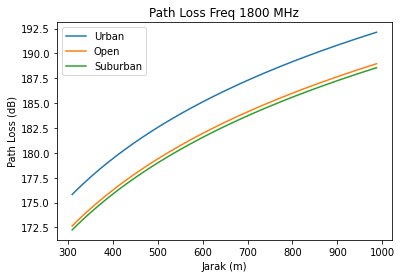

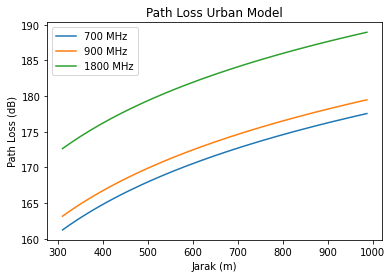

In [44]:
plt.figure()
plt.title('Path Loss Freq 1800 MHz')
plt.plot(d_sort, Urban_sort, label='Urban')
plt.plot(d_sort, Open_sort, label='Open')
plt.plot(d_sort, Suburban_sort, label='Suburban')
plt.legend()
plt.xlabel('Jarak (m)')
plt.ylabel('Path Loss (dB)')
plt.show()

#Model Urban
plt.figure()
plt.title('Path Loss Urban Model')
plt.plot(d_sort, f2_sort, label='700 MHz')
plt.plot(d_sort, f_sort, label='900 MHz')
plt.plot(d_sort, f3_sort, label='1800 MHz')
plt.legend()
plt.xlabel('Jarak (m)')
plt.ylabel('Path Loss (dB)')
plt.show()

In [45]:
#Daya Transmitter
def daytrans (ht, hl, gt, gr):
  dayter = (10*(np.log(ht))) - hl + gt + gr
  dayter = 10**(dayter/10)
  return dayter

power_tran = 30000
gain_tran = 10
gain_rece = 2

In [46]:
PTUrban = daytrans(power_tran, Urban_sort, gain_tran, gain_rece)
PTSuburban = daytrans(power_tran, Suburban_sort, gain_tran, gain_rece)
PTOpen = daytrans(power_tran, Open_sort, gain_tran, gain_rece)
PTUrban2 = daytrans(power_tran, f_sort, gain_tran, gain_rece)
PTUrban3 = daytrans(power_tran, f2_sort, gain_tran, gain_rece)

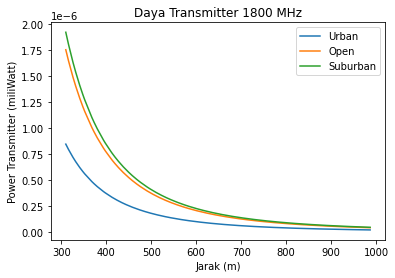

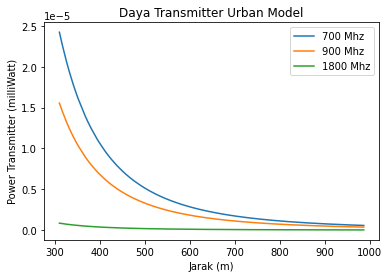

In [47]:
#Frekuensi 1800 MHz
plt.figure()
plt.title("Daya Transmitter 1800 MHz")
plt.plot(d_sort, PTUrban, label = "Urban")
plt.plot(d_sort, PTOpen, label = "Open")
plt.plot(d_sort, PTSuburban, label = "Suburban")
plt.xlabel('Jarak (m)')
plt.ylabel('Power Transmitter (miliWatt)')
plt.legend()
plt.show()

#Model Urban
plt.figure()
plt.title("Daya Transmitter Urban Model")
plt.plot(d_sort, PTUrban3, label = "700 Mhz")
plt.plot(d_sort, PTUrban2, label = "900 Mhz")
plt.plot(d_sort, PTUrban, label = "1800 Mhz")
plt.xlabel('Jarak (m)')
plt.ylabel('Power Transmitter (milliWatt)')
plt.legend()
plt.show()

In [48]:
def snr(dayter, BW):
  noise = -174 + 10*(np.log10(BW))
  noise = 10**(noise/10)
  sigtonoi = dayter/noise
  return sigtonoi

bw =  5*(10**6)

In [49]:
SNRUrban = snr(PTUrban, bw)
SNRSuburban = snr(PTSuburban, bw)
SNROpen = snr(PTOpen, bw)
SNRUrban2 = snr(PTUrban2, bw)
SNRUrban3 = snr(PTUrban3, bw)

In [50]:
#Signal to Noise Ratio
def snr(dayter, BW):
  noise = -174 + 10*(np.log10(BW))
  noise = 10**(noise/10)
  sigtonoi = dayter/noise
  return sigtonoi

bw =  5*(10**6)

In [51]:
SNRUrban = snr(PTUrban, bw)
SNRSuburban = snr(PTSuburban, bw)
SNROpen = snr(PTOpen, bw)
SNRUrban2 = snr(PTUrban2, bw)
SNRUrban3 = snr(PTUrban3, bw)

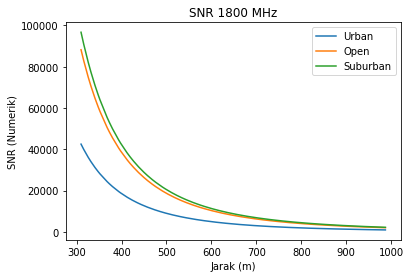

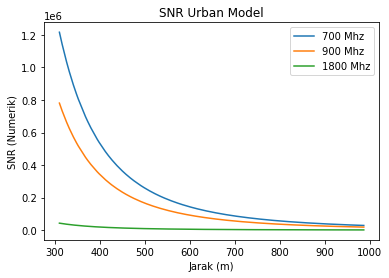

In [52]:
#SNR Frekuensi 1800 MHz
plt.figure()
plt.title("SNR 1800 MHz")
plt.plot(d_sort, SNRUrban, label = "Urban")
plt.plot(d_sort, SNROpen, label = "Open")
plt.plot(d_sort, SNRSuburban, label = "Suburban")
plt.xlabel('Jarak (m)')
plt.ylabel('SNR (Numerik)')
plt.legend()
plt.show()

#SNR Urban Model
plt.figure()
plt.title("SNR Urban Model")
plt.plot(d_sort, SNRUrban3, label = "700 Mhz")
plt.plot(d_sort, SNRUrban2, label = "900 Mhz")
plt.plot(d_sort, SNRUrban, label = "1800 Mhz")
plt.xlabel('Jarak (m)')
plt.ylabel('SNR (Numerik)')
plt.legend()
plt.show()


In [53]:
#Kapasitas Seluler 
def kapasitas (sig, BW):
  kpssel = BW*(np.log2(1+sig))
  return kpssel

In [54]:
KapasitasUrban = kapasitas(SNRUrban, bw)
KapasitasSuburban = kapasitas(SNRSuburban, bw)
KapasitasOpen = kapasitas(SNROpen, bw)
KapasitasUrban2 = kapasitas(SNRUrban2, bw)
KapasitasUrban3 = kapasitas(SNRUrban3, bw)

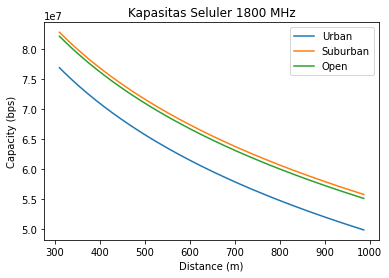

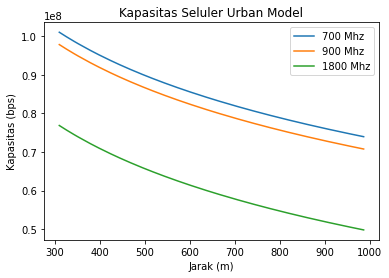

In [55]:
#Kapasitas Seluler 1800 Mhz
plt.figure()
plt.title("Kapasitas Seluler 1800 MHz")
plt.plot(d_sort,KapasitasUrban, label = "Urban")
plt.plot(d_sort,KapasitasSuburban, label = "Suburban")
plt.plot(d_sort,KapasitasOpen, label = "Open")
plt.xlabel('Distance (m)')
plt.ylabel('Capacity (bps)')
plt.legend()
plt.show()

#Kapasitas Seluler Urban Model 
plt.figure()
plt.title("Kapasitas Seluler Urban Model")
plt.plot(d_sort, KapasitasUrban3, label = "700 Mhz")
plt.plot(d_sort, KapasitasUrban2, label = "900 Mhz")
plt.plot(d_sort, KapasitasUrban, label = "1800 Mhz")
plt.xlabel('Jarak (m)')
plt.ylabel('Kapasitas (bps)')
plt.legend()
plt.show()